In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
df = pd.read_csv('Car details.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# EDA


In [3]:
df.shape

(8128, 13)

In [4]:
df.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  

In [5]:
df.describe

<bound method NDFrame.describe of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission

In [6]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [7]:
df.duplicated().sum()

1202

In [8]:
duplicate_rows = df[df.duplicated()]


In [9]:
df2= df.drop_duplicates()

In [10]:
df2.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

# One Hot Encoding


In [11]:
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
df_encoded = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

                           name  year  selling_price  km_driven     mileage  \
0        Maruti Swift Dzire VDI  2014         450000     145500   23.4 kmpl   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  21.14 kmpl   
2      Honda City 2017-2020 EXi  2006         158000     140000   17.7 kmpl   
3     Hyundai i20 Sportz Diesel  2010         225000     127000   23.0 kmpl   
4        Maruti Swift VXI BSIII  2007         130000     120000   16.1 kmpl   

    engine   max_power                    torque  seats  fuel_Diesel  \
0  1248 CC      74 bhp            190Nm@ 2000rpm    5.0            1   
1  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm    5.0            1   
2  1497 CC      78 bhp     12.7@ 2,700(kgm@ rpm)    5.0            0   
3  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm    5.0            1   
4  1298 CC    88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0            0   

   fuel_LPG  fuel_Petrol  seller_type_Individual  \
0         0            0                

In [12]:
# Convert columns to numeric, forcing non-numeric values to NaN
df_encoded["mileage"] = pd.to_numeric(df_encoded["mileage"].str.extract('(\d+)', expand=False), errors='coerce')
df_encoded["engine"] = pd.to_numeric(df_encoded["engine"].str.extract('(\d+)', expand=False), errors='coerce')
df_encoded["max_power"] = pd.to_numeric(df_encoded["max_power"].str.extract('(\d+)', expand=False), errors='coerce')
df_encoded["torque"] = pd.to_numeric(df_encoded["torque"].str.extract('(\d+)', expand=False), errors='coerce')


In [13]:
# Fill NaN values with the mean of each column
df_encoded["mileage"] = df_encoded["mileage"].fillna(df_encoded["mileage"].mean())
df_encoded["engine"] = df_encoded["engine"].fillna(df_encoded["engine"].mean())
df_encoded["max_power"] = df_encoded["max_power"].fillna(df_encoded["max_power"].mean())
df_encoded["torque"] = df_encoded["torque"].fillna(df_encoded["torque"].mean())
df_encoded["seats"] = df_encoded["seats"].fillna(df_encoded["seats"].mean())


In [14]:
df_encoded.isnull().sum()

name                            0
year                            0
selling_price                   0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
torque                          0
seats                           0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

In [15]:
df_encoded.shape

(6926, 19)

In [16]:
df_encoded.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

# Analysis and visualization

C:\Users\Khushi Deb Barma\AppData\Local\Temp\ipykernel_6996\2078736137.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded[x], bins=20)
C:\Users\Khushi Deb Barma\AppData\Local\Temp\ipykernel_6996\2078736137.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded[x], bins=20)
C:

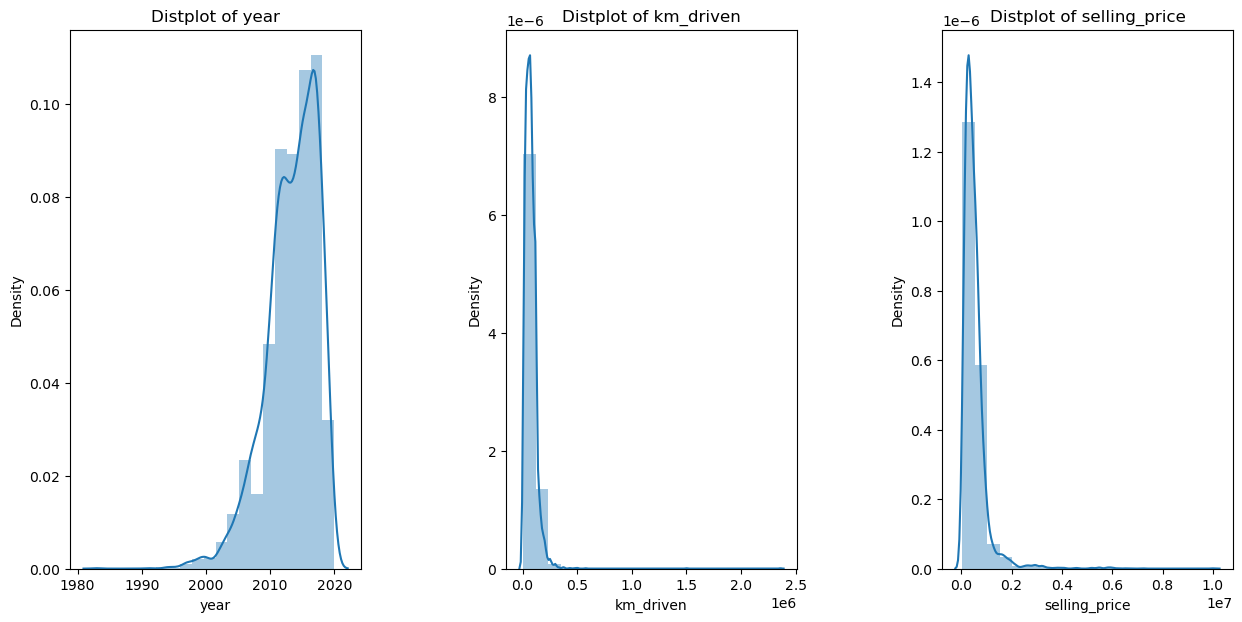

In [17]:
plt.figure(1, figsize=(15, 7))
n = 0
for x in ['year', 'km_driven', 'selling_price']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df_encoded[x], bins=20) 
    plt.title('Distplot of {}'.format(x))

plt.show()


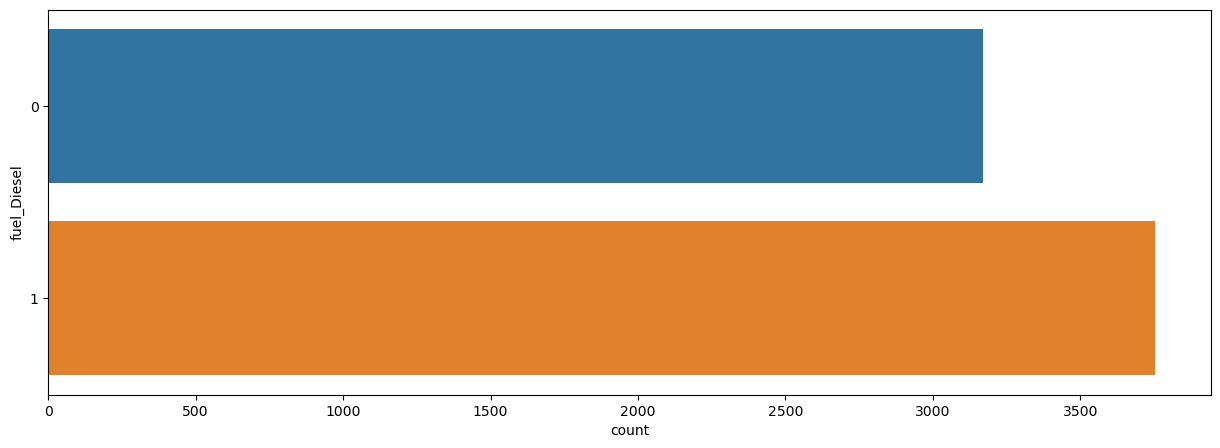

In [18]:
plt.figure(figsize = (15,5))
sns.countplot(y='fuel_Diesel' , data = df_encoded)
plt.show()

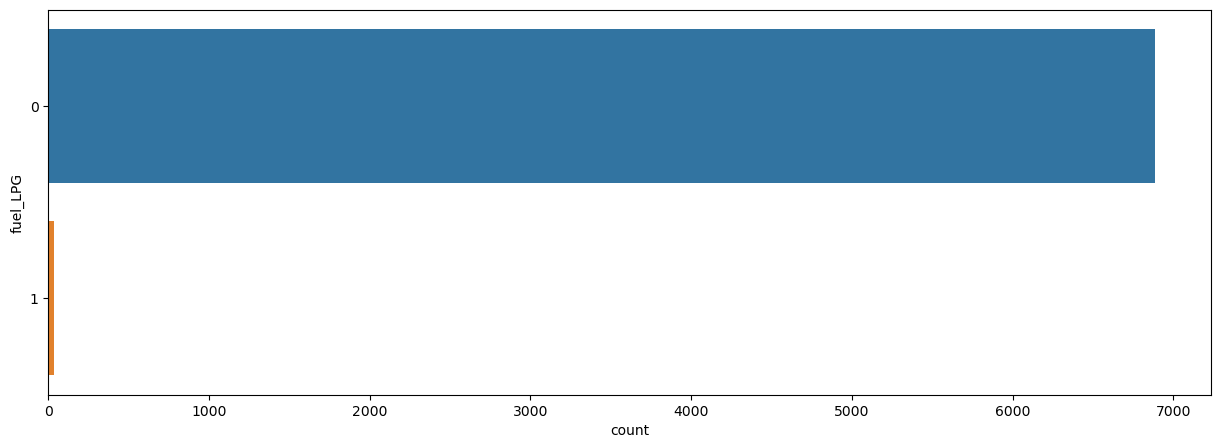

In [19]:
plt.figure(figsize = (15,5))
sns.countplot(y='fuel_LPG' , data = df_encoded)
plt.show()

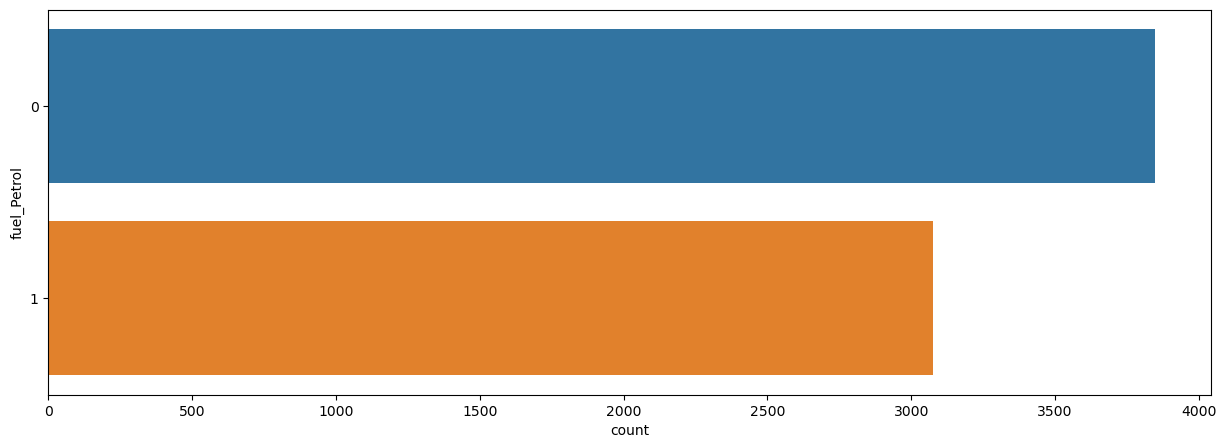

In [20]:
plt.figure(figsize = (15,5))
sns.countplot(y='fuel_Petrol' , data = df_encoded)
plt.show()

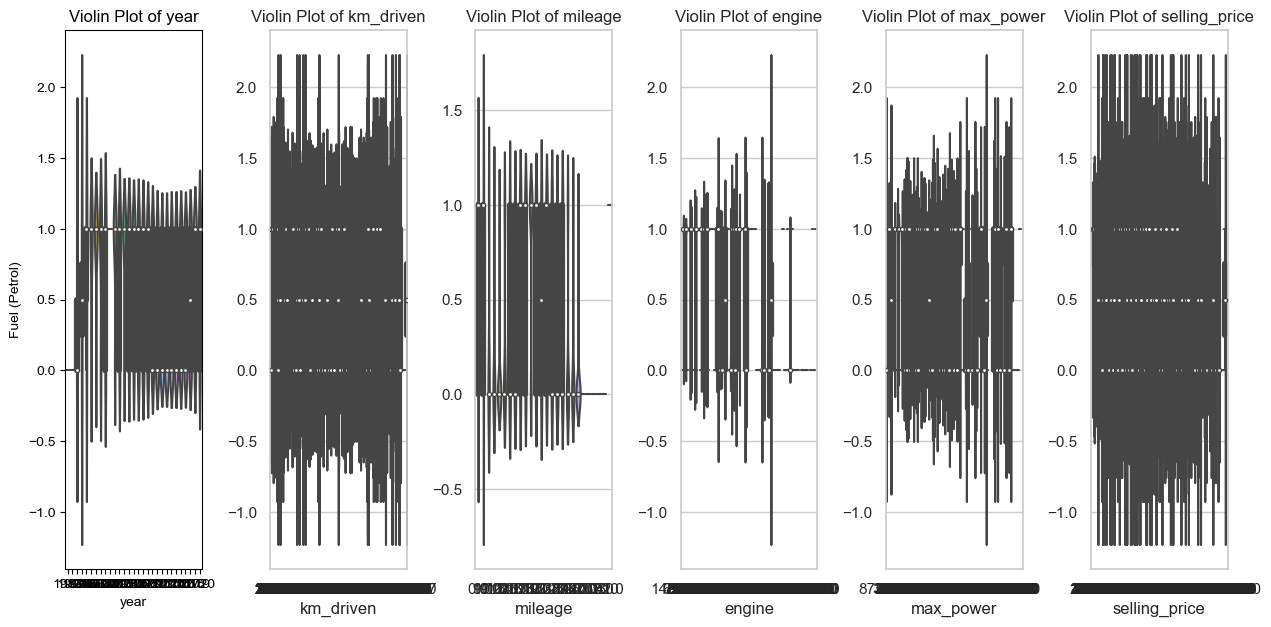

In [21]:
plt.figure(1, figsize=(15, 7))
n = 0
for cols in ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']:
    n += 1
    plt.subplot(1, 6, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='fuel_Petrol', data=df_encoded) 
    plt.ylabel("Fuel (Petrol)" if n == 1 else '')
    plt.title('Violin Plot of {}'.format(cols))

plt.show()


# Range of selling_price having the highest number of customer

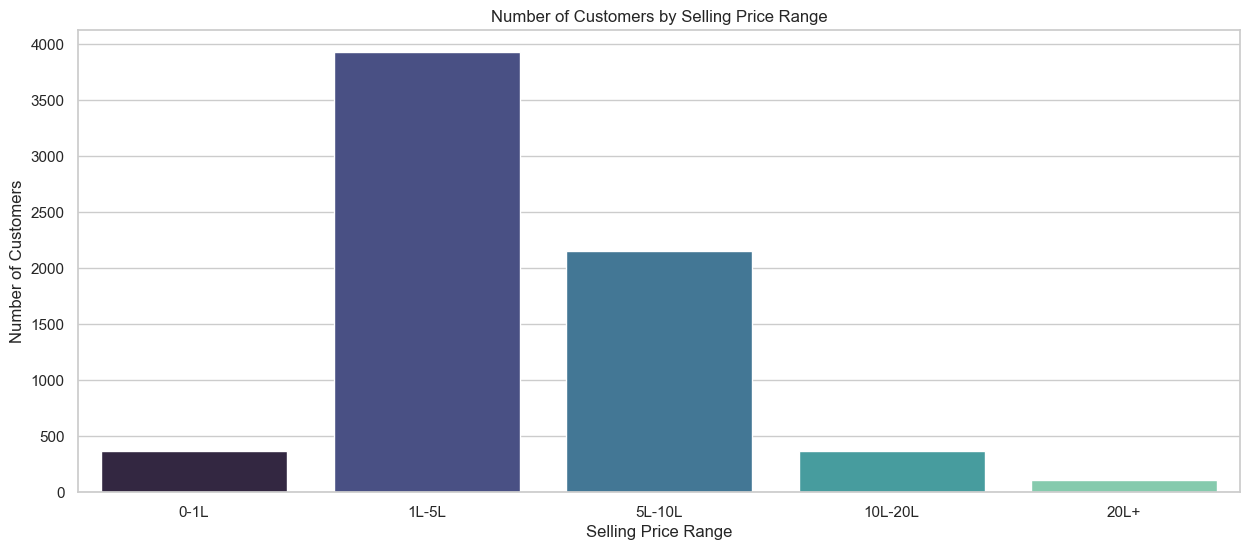

In [22]:
# Define ranges for selling_price
price_0_1L = df_encoded.selling_price[(df_encoded.selling_price >= 0) & (df_encoded.selling_price <= 100000)]
price_1L_5L = df_encoded.selling_price[(df_encoded.selling_price > 100000) & (df_encoded.selling_price <= 500000)]
price_5L_10L = df_encoded.selling_price[(df_encoded.selling_price > 500000) & (df_encoded.selling_price <= 1000000)]
price_10L_20L = df_encoded.selling_price[(df_encoded.selling_price > 1000000) & (df_encoded.selling_price <= 2000000)]
price_above_20L = df_encoded.selling_price[df_encoded.selling_price > 2000000]

# Create labels and count the number of entries in each range
price_ranges = ["0-1L", "1L-5L", "5L-10L", "10L-20L", "20L+"]
price_counts = [len(price_0_1L.values), len(price_1L_5L.values), len(price_5L_10L.values), len(price_10L_20L.values), len(price_above_20L.values)]

# Plot the results using a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x=price_ranges, y=price_counts, palette="mako")
plt.title("Number of Customers by Selling Price Range")
plt.xlabel("Selling Price Range")
plt.ylabel("Number of Customers")
plt.show()


# bar plot showing the number of cars in each year range

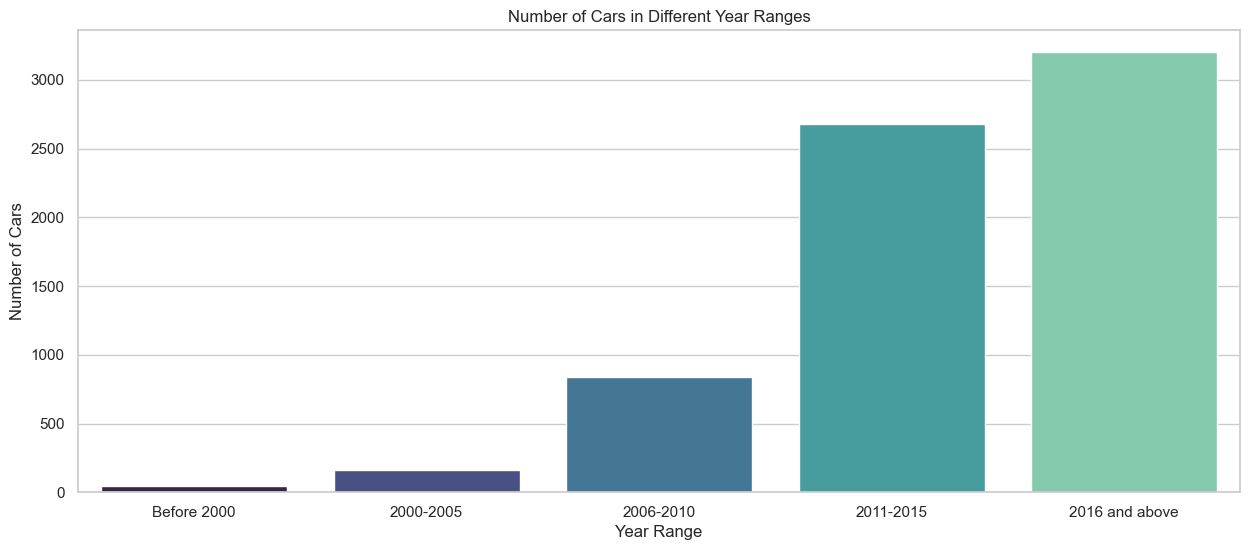

In [23]:
# Define year ranges
bins = [0, 2000, 2005, 2010, 2015, float('inf')]
labels = ['Before 2000', '2000-2005', '2006-2010', '2011-2015', '2016 and above']

# Create a new column 'year_range' based on the defined bins
df_encoded['year_range'] = pd.cut(df_encoded['year'], bins=bins, labels=labels, right=False)

# Group by the 'year_range' and count the number of cars in each range
year_counts = df_encoded['year_range'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(15, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="mako")
plt.title("Number of Cars in Different Year Ranges")
plt.xlabel("Year Range")
plt.ylabel("Number of Cars")
plt.show()


# bar plot showing the number of cars in each km_driven range

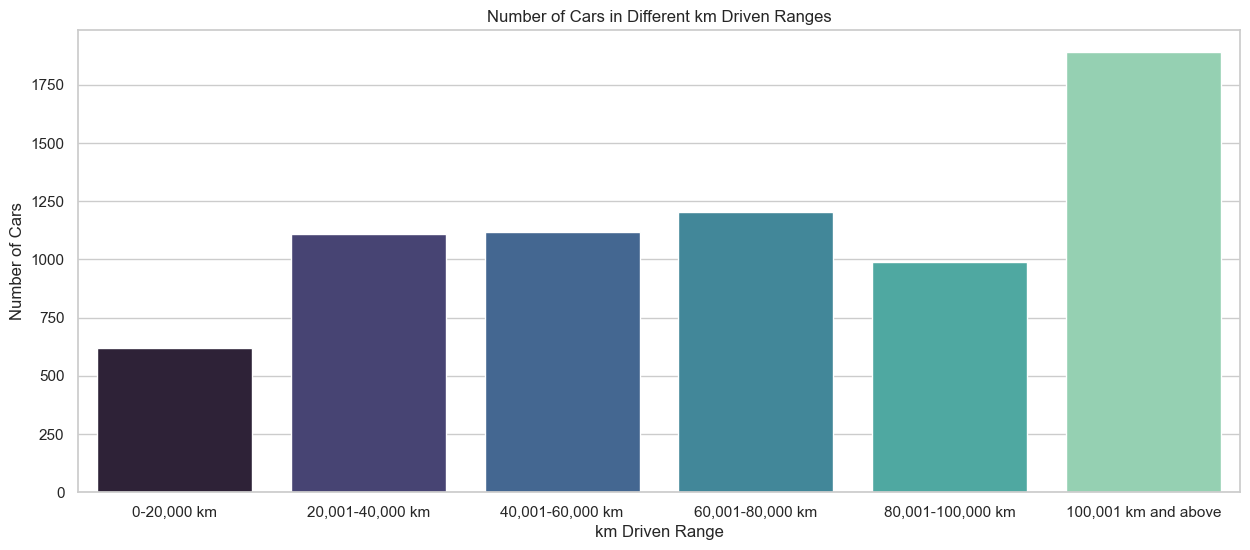

In [24]:
# Define km_driven ranges
bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
labels = ['0-20,000 km', '20,001-40,000 km', '40,001-60,000 km', '60,001-80,000 km', '80,001-100,000 km', '100,001 km and above']

# Create a new column 'km_driven_range' based on the defined bins
df_encoded['km_driven_range'] = pd.cut(df_encoded['km_driven'], bins=bins, labels=labels, right=False)

# Group by the 'km_driven_range' and count the number of cars in each range
km_driven_counts = df_encoded['km_driven_range'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(15, 6))
sns.barplot(x=km_driven_counts.index, y=km_driven_counts.values, palette="mako")
plt.title("Number of Cars in Different km Driven Ranges")
plt.xlabel("km Driven Range")
plt.ylabel("Number of Cars")
plt.show()


# bar plot showing the top 10 car brands

In [25]:
df_encoded['brand'] = df_encoded['name'].str.split().str[0]

# Checking the unique brands
df_encoded['brand'].unique()


array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [26]:
# Grouping by brand and calculating the average selling price
brand_avg_price = df_encoded.groupby('brand')['selling_price'].mean().sort_values(ascending=False).reset_index()

# Displaying the top 10 brands by average selling price
top_10_brands = brand_avg_price.head(10)
top_10_brands


,brand,selling_price
0,Lexus,5.150000e+06
1,Volvo,4.036111e+06
2,BMW,2.770638e+06
3,Jaguar,2.748250e+06
4,Land,2.716667e+06
5,Audi,2.422364e+06
6,Mercedes-Benz,2.253348e+06
7,Jeep,1.789227e+06
8,MG,1.783333e+06
9,Isuzu,1.752500e+06


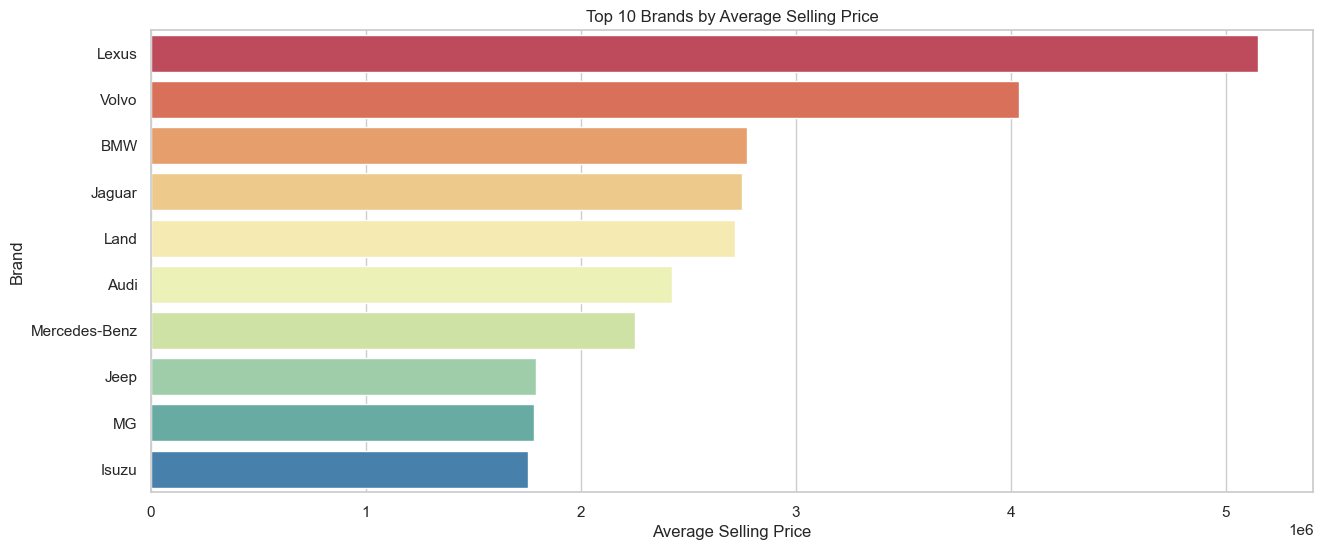

In [27]:
plt.figure(figsize=(15, 6))
sns.barplot(x='selling_price', y='brand', data=top_10_brands, palette="Spectral")
plt.title("Top 10 Brands by Average Selling Price")
plt.xlabel("Average Selling Price")
plt.ylabel("Brand")
plt.show()


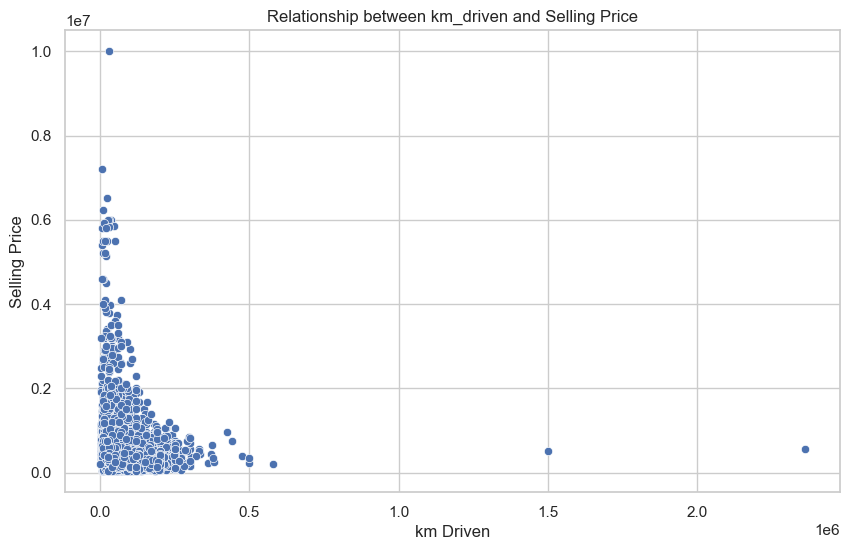

In [28]:
# Ploting the relationship between km_driven and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="km_driven", y="selling_price", data=df_encoded)
plt.title("Relationship between km_driven and Selling Price")
plt.xlabel("km Driven")
plt.ylabel("Selling Price")
plt.show()


# Heatmap of Correlation

C:\Users\Khushi Deb Barma\AppData\Local\Temp\ipykernel_6996\2313746131.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')


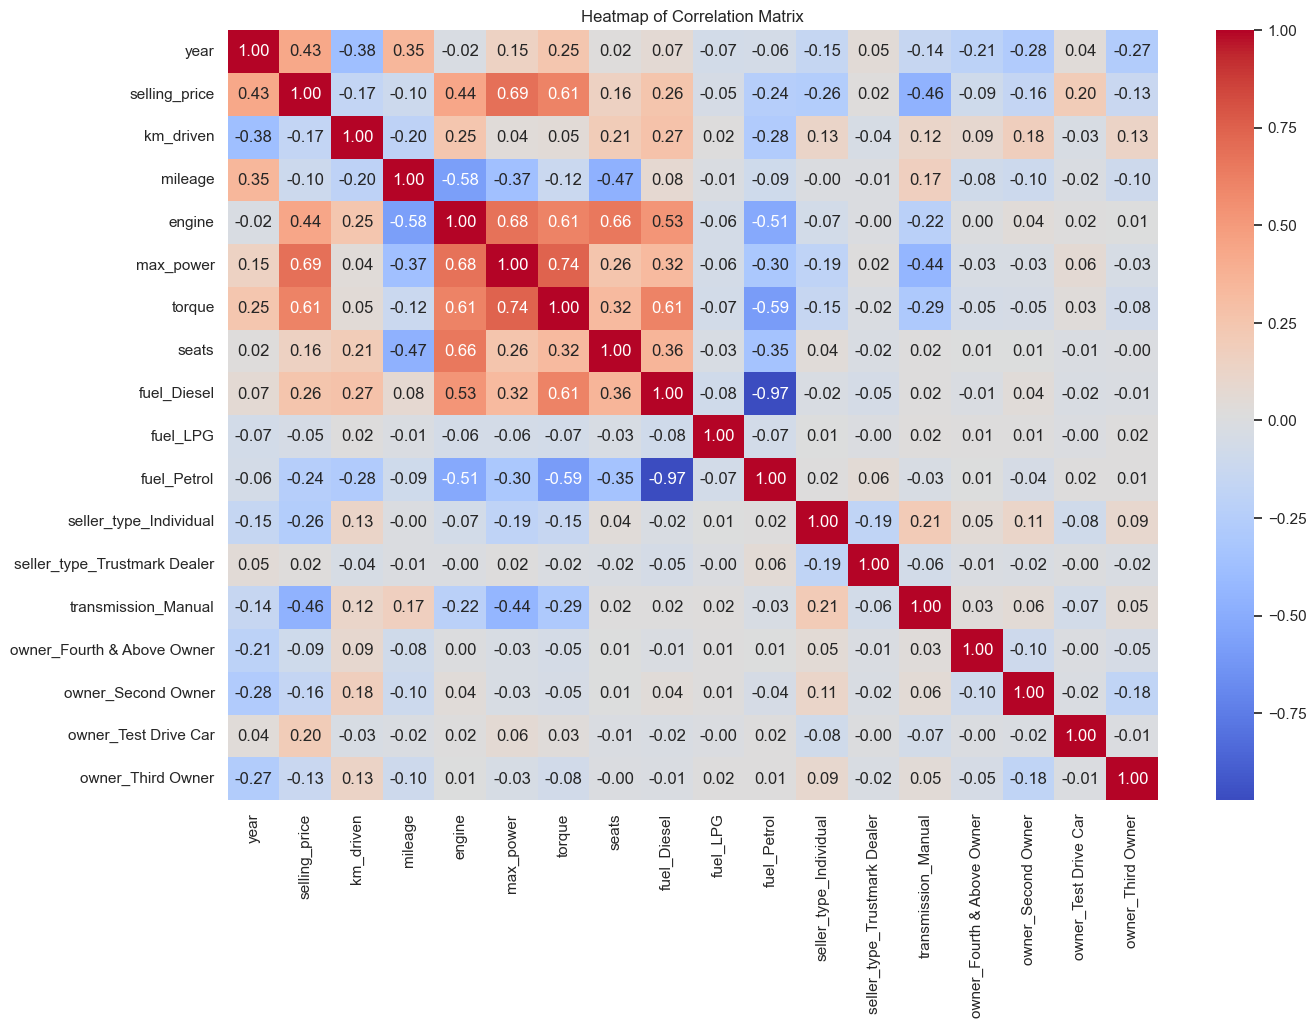

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


# Clustering

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

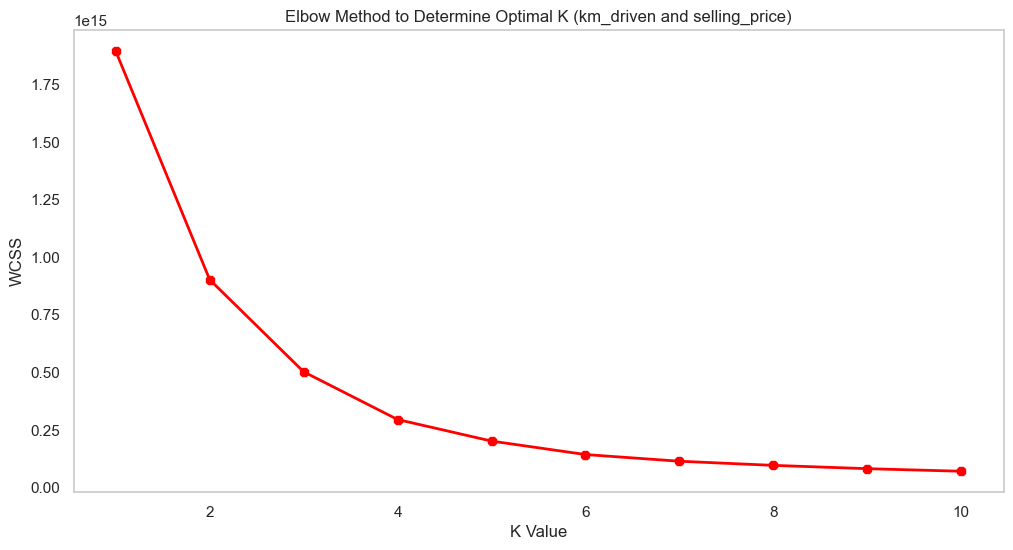

In [36]:
# 1. Selecting Features for Behavioral Segmentation
X1 = df_encoded.loc[:, ["km_driven", "selling_price"]].values

# 2. Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K (km_driven and selling_price)")
plt.show()


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


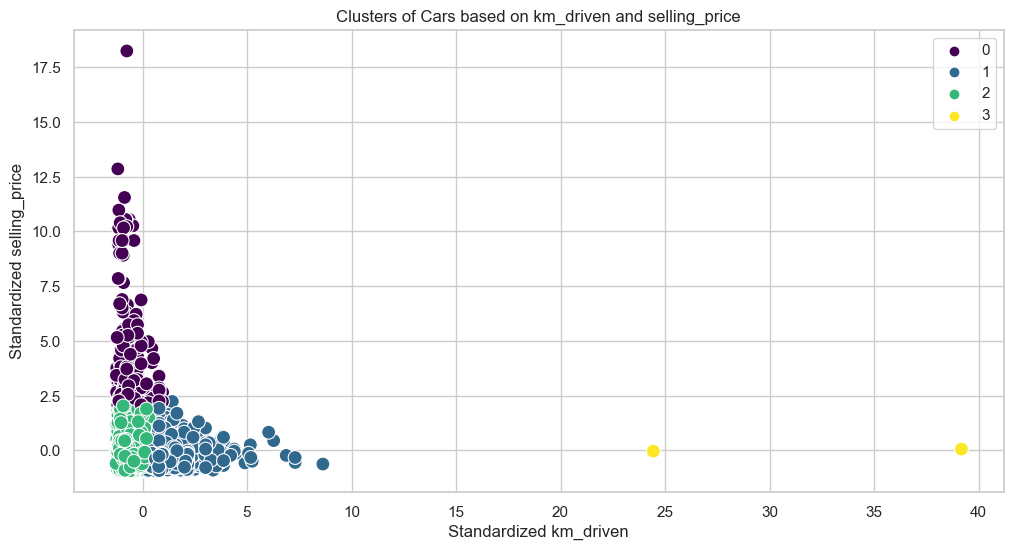

In [37]:
# Applying K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original dataframe
df_encoded['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette="viridis", s=100)
plt.title("Clusters of Cars based on km_driven and selling_price")
plt.xlabel("Standardized km_driven")
plt.ylabel("Standardized selling_price")
plt.show()

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

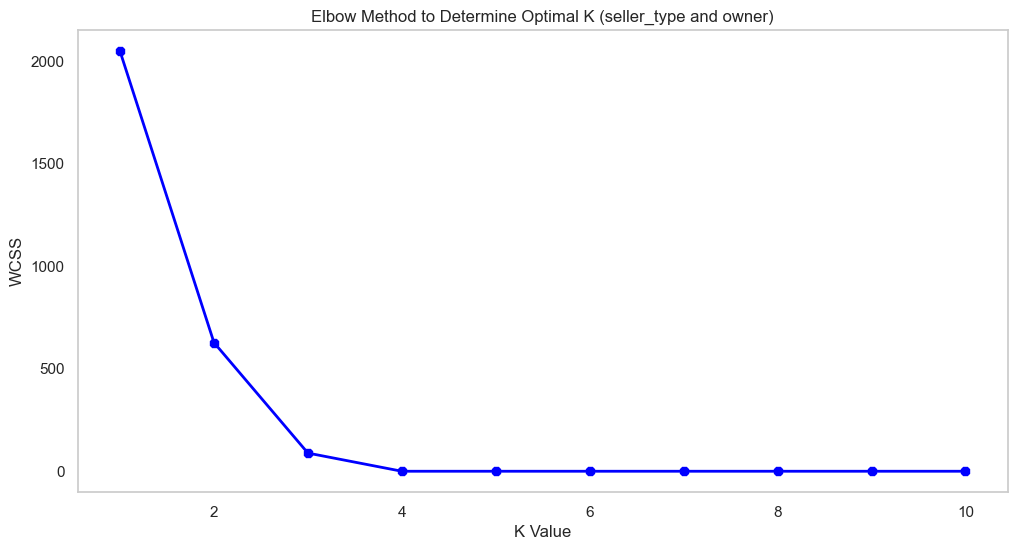

In [38]:
# 1. Select Features for Demographic Segmentation
X2 = df_encoded.loc[:, ["seller_type_Individual", "owner_Second Owner"]].values

# 2. Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="blue", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K (seller_type and owner)")
plt.show()


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


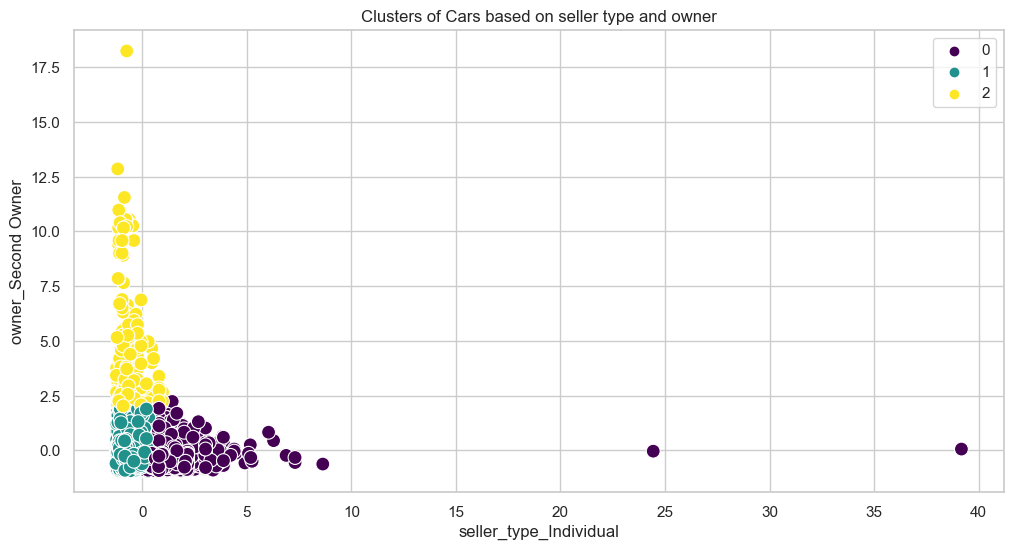

In [39]:
# Applying K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original dataframe
df_encoded['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette="viridis", s=100)
plt.title("Clusters of Cars based on seller type and owner")
plt.xlabel("seller_type_Individual")
plt.ylabel("owner_Second Owner")
plt.show()